Задача БИНАРНОЙ классификации:

На 5000 человек проверяли, как возраст и здоровье влияют на потерю слуха и на способность слышать высокие тона. У нас есть данные о возрасте участников, оценке его здоровья и результат аудио теста. Требуется построить модель, которая будет предсказывать способность человека слышать высокие тона звука на основе оценки его здоровья и возраста.

Признаки: 

- возраст в годах
- оценка физичского здоровья

Целевая переменная:
- 0 - аудио тест не пройден;
- 1 - аудио тест пройден

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Изучим данные

In [11]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Regression\Data\hearing_test.csv")

In [12]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [13]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


мы видим, что средний возраст 51 год, среднее значение физического здоровья 32. Минимальный возраст 18 лет, физическое здоровье 0. Максимальный возраст 90 лет и физическое здоровье 50. 

Посмотрим значения целевой переменной test_result

In [14]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

Мы видим, что 3000 человек прошли тест и 2000 не прошли. Нарисуем график для красивой презентации и рассказах об этих данных.

<Axes: xlabel='test_result', ylabel='count'>

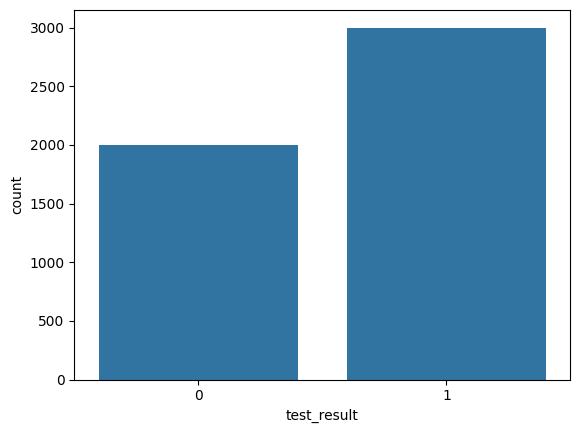

In [15]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

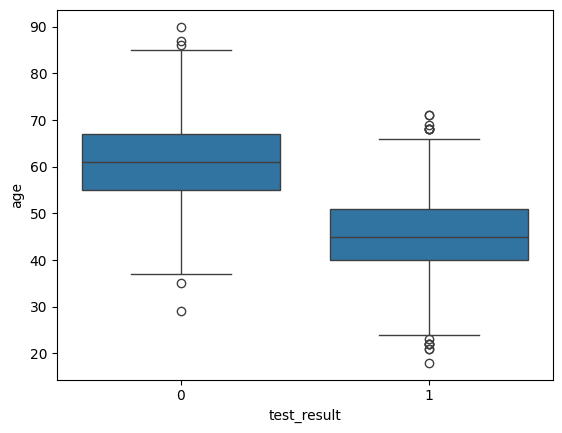

In [16]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result', y='age')

С помощью этого графика мы можем ответить на вопрос, зависит ли наша целевая переменная от возраста. Зависимость есть - те, кто не прошел тест старше тех, кто его прошел. 

Построим график для признака physical_score

<Axes: xlabel='test_result', ylabel='physical_score'>

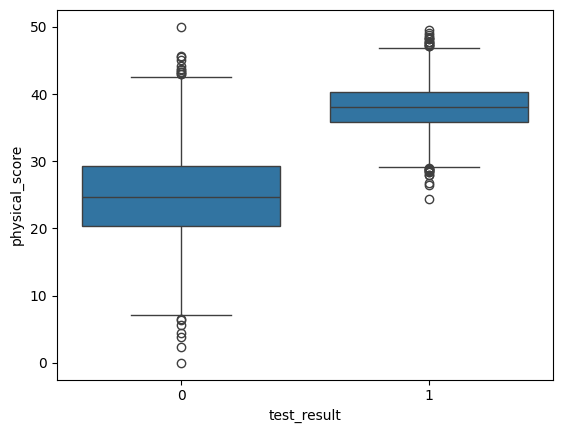

In [17]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='test_result', y='physical_score')

Те, кто прошел тест имеет заметно лучшие данные о физическом здоровье чем те, кто не прошел тест (и распределение данных имеет более широкий диапазон различых значений).

Нарисуем график разпределения для визуализации связи между данными о возрасте и данными о физическом здоровье

<Axes: xlabel='age', ylabel='physical_score'>

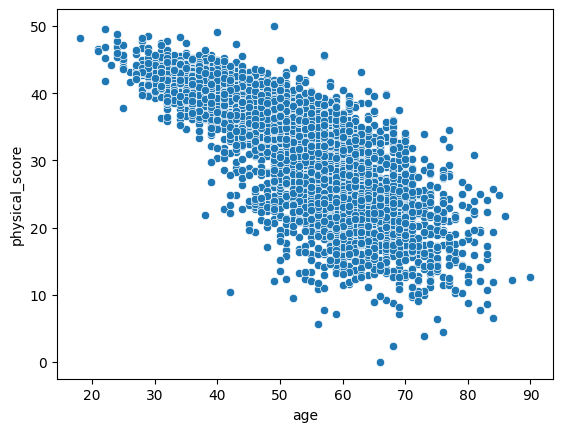

In [18]:
sns.scatterplot(x='age', y='physical_score', data=df)

Мы видим, что физическое здоровье с возрастом становится меньше. 

Закрасим данные, где тест пройден и повысим прозрачность точек для видимости мест смешения точек

<Axes: xlabel='age', ylabel='physical_score'>

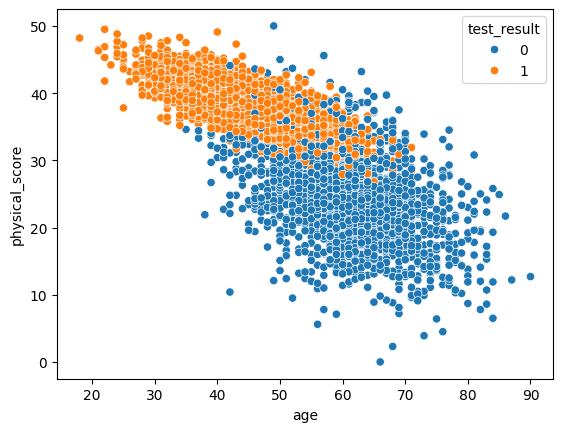

In [19]:
plt.figure(dpi=100)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

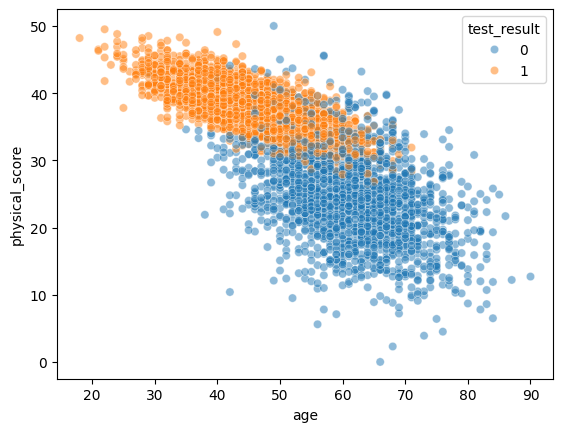

In [20]:
plt.figure(dpi=100)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

Построим обобщенный график зависимости и распределения признаков

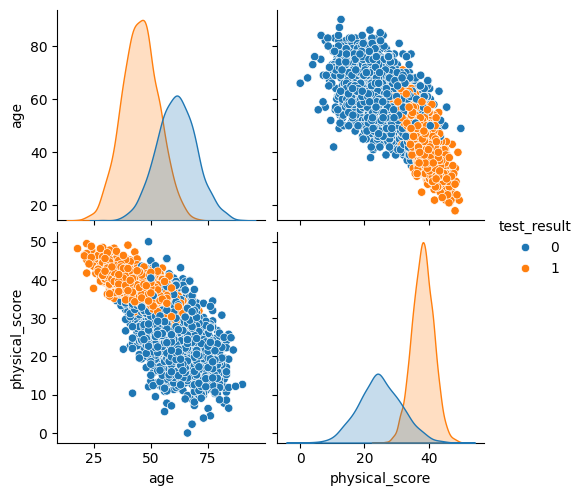

In [21]:
sns.pairplot(data=df, hue='test_result')

Нарисуем тепловую карту для корреляции признаков

<Axes: >

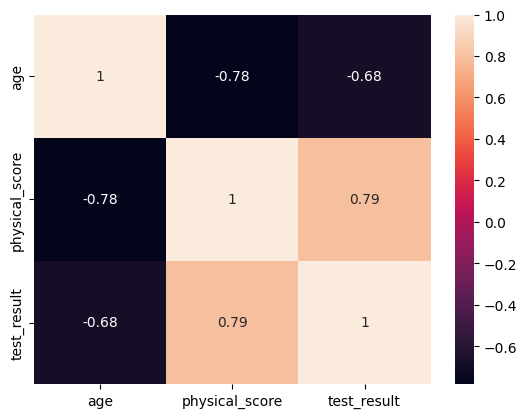

In [22]:
sns.heatmap(df.corr(), annot=True)

Для признака physical_score мы видим положительную корреляцию с целевой переменной. Отрицательная корреляция с признаков age говорит о том, что при увеличении признака целевая переменная уменьшается. 

Нарисуем трехмерный график, что бы сделать наш анализ более информативным для категориальных признаков.

<Axes: xlabel='physical_score', ylabel='test_result'>

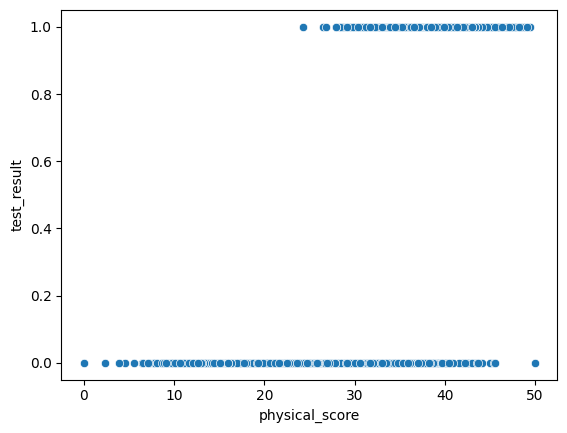

In [23]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

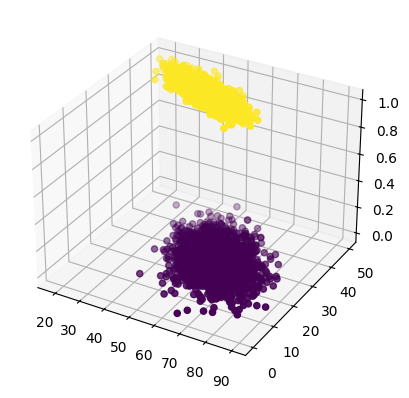

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])  # c = тоже, что hue

# Создадим и обучим модель логистической регрессии

In [25]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


Отделим признаки и целевую переменную

In [26]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [29]:
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)

In [32]:
scaled_X_test = scaler.transform(X_test)

Создадим модель логистической регрессии

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_model = LogisticRegression()

In [35]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [36]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

Отрицательный коэффициент означает, что с увелиением возраста способность слышать хуже. положительный коэффициент означает, что тест слуха пройден. physical_score больше вляет на целевую переменную, чем возраст. 

In [37]:
y_pred = log_model.predict(scaled_X_test)

In [38]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

Посмотрим вероятность принадлежности к классу 1 и к классу 0

In [39]:
y_pred_proba= log_model.predict_proba(scaled_X_test)

In [40]:
y_pred_proba

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

Оценим работу модели метриками для логистической регрессии (задачи классификации)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [43]:
accuracy_score(y_test, y_pred)

0.93

Это означает, что в 93 % случаем наша модель предскажет правильно, пройдет человек тест или нет. 

In [44]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

True Positive     True Negative

False Positive    False Negative

Вычислим другие метрики

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



Классы у нас 0 и 1.
- Recall означает, как часто мы получаем значение этого класса из всего набора значения этого класса.
- Precision означает, как часто мы правильно классифицируем случаи этого класса из всего набора значения этого класса.
- f1-score это гармоническое среднее между Precision и Recall.
- Support это количество случаем в том или ином классе

Можем отдельно вычислить эти метрики

In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
precision_score(y_test, y_pred)

np.float64(0.9331210191082803)

In [56]:
recall_score(y_test, y_pred)

np.float64(0.9543973941368078)

Попробуем получить не только значение класса, но и вероятности принадлежности для каждого из классов

In [66]:
log_model.predict_proba(scaled_X_test)

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [67]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

In [68]:
y_test[0]

np.int64(1)

Наше истинное значение класс 1 и с вероятностью 97,6% наша модель предскажет класс 1. И с вероятностью 2,3% она предсказывает класс 0. 

Посмотри на само предсказание.

In [69]:
log_model.predict(scaled_X_test)[0]

np.int64(1)